<a href="https://colab.research.google.com/github/malevashov/data-visualization-course-tsu/blob/main/Project2_Michael_Levashov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  PROJECT 2 - Michael Levashov

In this project, you will analyze local and global temperature data and compare the temperature trends of some cities to global temperature trends. Given the dataset for the annual average temperatures for the cities, find the city, the average temperature distribution of which was the most similar to the global average temperature distribution. Check only for these cites to simplfy the project:  'Nashville', 'London', 'Paris', 'New York', 'Moscow', 'Stockholm'

In [ ]:
#include all the modules here

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [ ]:
# load in the dataset into a pandas dataframe and show the size of the file and show the first 5 rows of the data

data = pd.read_csv("temp.csv")
print(data.shape)

(71058, 4)


In [ ]:
data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [ ]:
# Create a new data frame with the data of these cities only: 'Global', 'Nashville', 'London', 'Paris', 'New York', 'Moscow', 'Stockholm'

subsetdata = data[data["city"].isin(['Global','Nashville', 'London', 'Paris', 'New York', 'Moscow', 'Stockholm'])]
print(subsetdata.shape)
subsetdata.head()

(2163, 4)


,year,city,country,avg_temp
22553,1750,Global,Global,8.72
22554,1751,Global,Global,7.98
22555,1752,Global,Global,5.78
22556,1753,Global,Global,8.39
22557,1754,Global,Global,8.47


In [ ]:
subsetdata = subsetdata[subsetdata.country != 'Canada']
subsetdata[subsetdata['city'] == 'London']

,year,city,country,avg_temp
36278,1743,London,United Kingdom,7.54
36279,1744,London,United Kingdom,10.34
36280,1745,London,United Kingdom,4.13
36281,1746,London,United Kingdom,NaN
36282,1747,London,United Kingdom,NaN
...,...,...,...,...
36544,2009,London,United Kingdom,10.52
36545,2010,London,United Kingdom,9.38
36546,2011,London,United Kingdom,11.19
36547,2012,London,United Kingdom,10.00


In [ ]:
# Take only the data for the years between 1759 and 2013

yeardata = subsetdata[(subsetdata['year'] > 1758) & (subsetdata['year'] < 2014)]
print(yeardata.shape)
print(yeardata)

(1785, 4)
       year       city country  avg_temp
22562  1759     Global  Global      7.99
22563  1760     Global  Global      7.19
22564  1761     Global  Global      8.77
22565  1762     Global  Global      8.61
22566  1763     Global  Global      7.50
...     ...        ...     ...       ...
61298  2009  Stockholm  Sweden      7.54
61299  2010  Stockholm  Sweden      6.01
61300  2011  Stockholm  Sweden      8.18
61301  2012  Stockholm  Sweden      7.21
61302  2013  Stockholm  Sweden      7.10

[1785 rows x 4 columns]


In [ ]:
# Format your frame such that index will be the years, columns will be the cities and values will be the avg_temp

index = yeardata.pivot_table(index = 'year', columns = 'city', values = 'avg_temp')
print(index.shape)
index.head(10)

(255, 7)


city,Global,London,Moscow,Nashville,New York,Paris,Stockholm
year,,,,,,,
1759,7.99,9.80,3.45,13.83,9.01,10.66,6.58
1760,7.19,9.26,2.41,12.28,7.73,10.50,5.62
1761,8.77,9.69,4.14,14.77,10.18,10.55,6.88
1762,8.61,8.99,4.10,14.27,9.55,10.06,6.23
1763,7.50,8.75,2.91,12.20,7.23,9.83,5.61
1764,8.40,9.14,4.35,14.18,9.55,10.31,6.64
1765,8.25,8.95,4.30,13.86,8.96,10.15,6.17
1766,8.41,9.07,4.23,14.70,10.09,9.99,6.88
1767,8.22,8.98,4.05,13.50,8.52,10.01,5.69


In [ ]:
index[index.isna().any(axis=1)]

city,Global,London,Moscow,Nashville,New York,Paris,Stockholm
year,,,,,,,
1780,9.43,9.67,3.9,NaN,NaN,10.63,6.13


In [ ]:
# Fill the null data with the previous value -- fillna(method='pad')

nulldata = index.fillna(method = 'pad')
print(nulldata)

city  Global  London  Moscow  Nashville  New York  Paris  Stockholm
year                                                               
1759    7.99    9.80    3.45      13.83      9.01  10.66       6.58
1760    7.19    9.26    2.41      12.28      7.73  10.50       5.62
1761    8.77    9.69    4.14      14.77     10.18  10.55       6.88
1762    8.61    8.99    4.10      14.27      9.55  10.06       6.23
1763    7.50    8.75    2.91      12.20      7.23   9.83       5.61
...      ...     ...     ...        ...       ...    ...        ...
2009    9.51   10.52    5.69      14.62     10.14  11.46       7.54
2010    9.70    9.38    5.91      15.05     11.36  10.41       6.01
2011    9.52   11.19    6.01      15.46     11.27  12.33       8.18
2012    9.51   10.00    5.20      16.35     11.97  11.22       7.21
2013    9.61    9.91    6.80      16.17     12.16  11.01       7.10

[255 rows x 7 columns]


In [ ]:
nulldata[nulldata.isna().any(axis=1)]


city,Global,London,Moscow,Nashville,New York,Paris,Stockholm
year,,,,,,,


Text(0.5, 0, 'Years')

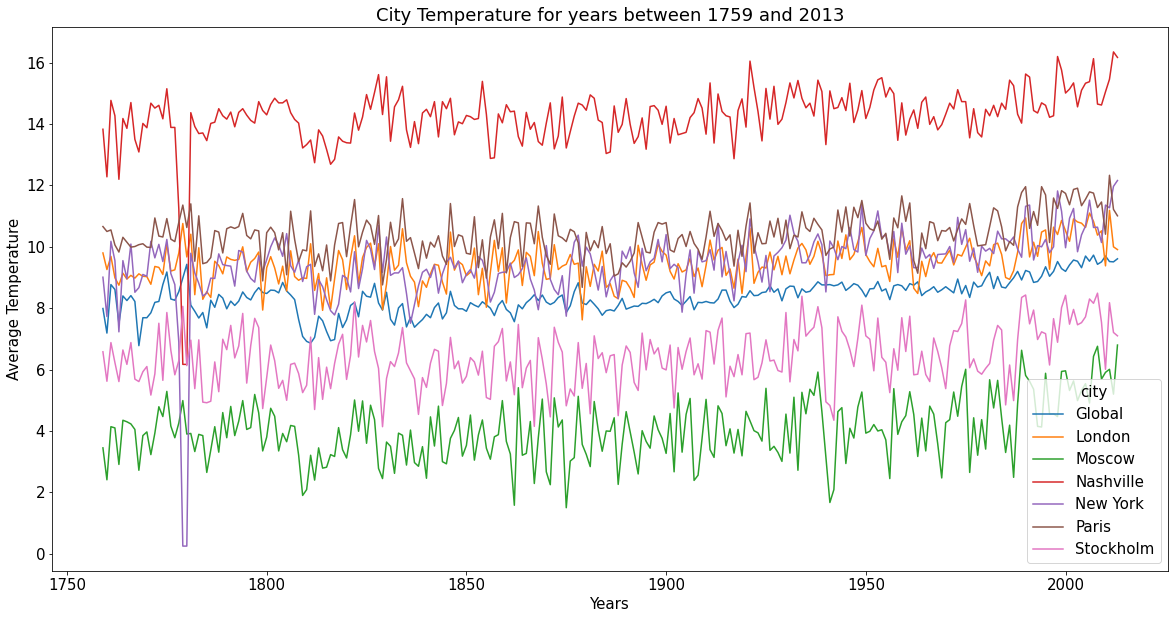

In [ ]:
# Draw all the global and city temperatures on the same plot

plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams.update({'font.size': 15})


ax = nulldata.plot.line(title = "City Temperature for years between 1759 and 2013")
ax.set_ylabel('Average Temperature')
ax.set_xlabel('Years')


In [ ]:
# Find the correlation matrix

nulldata.corr()


city,Global,London,Moscow,Nashville,New York,Paris,Stockholm
city,,,,,,,
Global,1.000000,0.533658,0.622445,0.329276,0.393830,0.519043,0.461624
London,0.533658,1.000000,0.537499,0.171471,0.240921,0.951816,0.762346
Moscow,0.622445,0.537499,1.000000,0.230442,0.299764,0.537684,0.782200
Nashville,0.329276,0.171471,0.230442,1.000000,0.907137,0.159702,0.202348
New York,0.393830,0.240921,0.299764,0.907137,1.000000,0.240851,0.255054
Paris,0.519043,0.951816,0.537684,0.159702,0.240851,1.000000,0.717602
Stockholm,0.461624,0.762346,0.782200,0.202348,0.255054,0.717602,1.000000


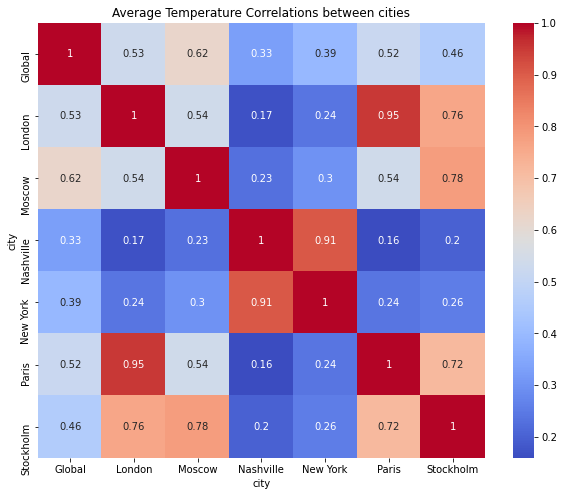

In [ ]:
# Use seaborn heatmap to see the correlations

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 10})

corr_values = nulldata.corr()

ax = sns.heatmap(corr_values, annot = True, cmap = 'coolwarm').set_title('Average Temperature Correlations between cities')


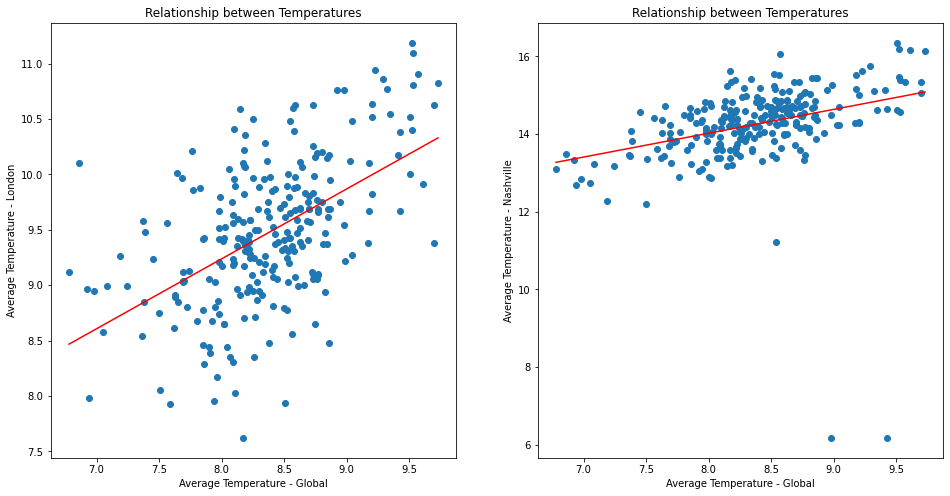

In [ ]:
# Draw two subplots to show the correlations of the cities

plt.rcParams['figure.figsize'] = [15, 8]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))

x = nulldata['Global']
y = nulldata['London']
z = nulldata['Nashville']

ax1.scatter(x, y)
ax1.set_title('Relationship between Temperatures')
ax1.set_xlabel('Average Temperature - Global')
ax1.set_ylabel('Average Temperature - London')
ax1.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

ax2.scatter(x, z)
ax2.set_title('Relationship between Temperatures')
ax2.set_xlabel('Average Temperature - Global')
ax2.set_ylabel('Average Temperature - Nashville')
ax2.plot(np.unique(x), np.poly1d(np.polyfit(x, z, 1))(np.unique(x)), color='red')

plt.show()

# Second part the project, use rolling window caluculations and calculate the correlations again.

In [ ]:
# <<your data frame>> = <<your data frame>>.rolling(window=7,min_periods=1).mean()

rollingdata = nulldata.rolling(window=7,min_periods=1).mean()
# print(rollingdata)

Text(0.5, 0, 'Years')

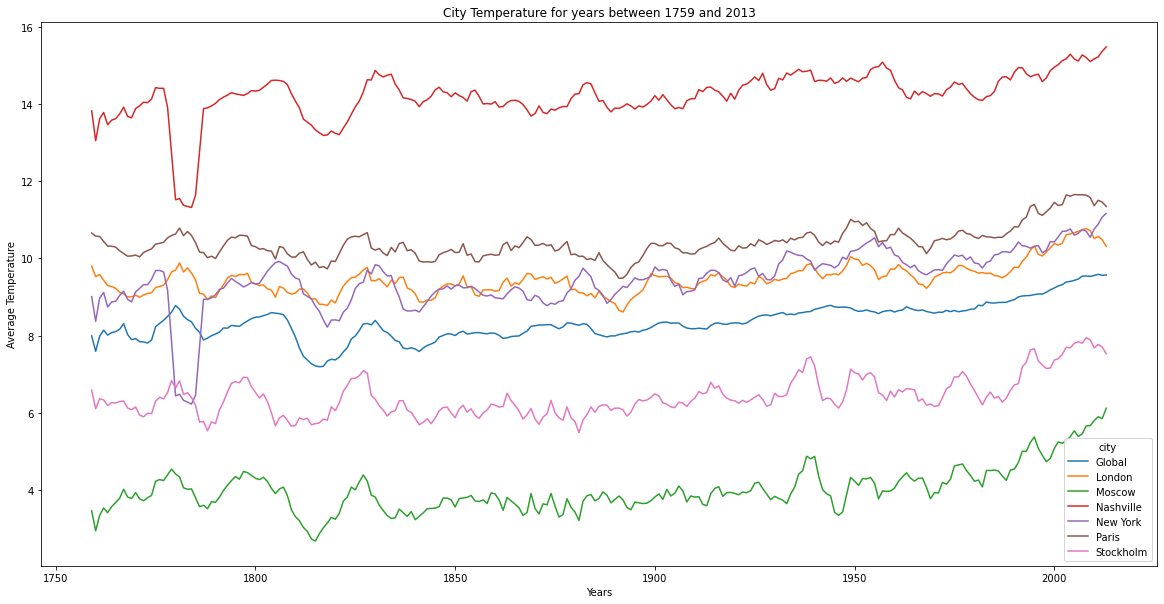

In [ ]:
# Draw all the global and city temperatures on the same plot

plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams.update({'font.size': 10})


ax = rollingdata.plot.line(title = "City Temperature for years between 1759 and 2013")
ax.set_ylabel('Average Temperature')
ax.set_xlabel('Years')

In [ ]:
# Find the correlation matrix

rollingdata.corr()

city,Global,London,Moscow,Nashville,New York,Paris,Stockholm
city,,,,,,,
Global,1.000000,0.828264,0.866730,0.535180,0.633141,0.814887,0.748984
London,0.828264,1.000000,0.803047,0.421844,0.516510,0.979802,0.880821
Moscow,0.866730,0.803047,1.000000,0.470297,0.554530,0.817926,0.878831
Nashville,0.535180,0.421844,0.470297,1.000000,0.944510,0.403311,0.428162
New York,0.633141,0.516510,0.554530,0.944510,1.000000,0.504301,0.515911
Paris,0.814887,0.979802,0.817926,0.403311,0.504301,1.000000,0.876083
Stockholm,0.748984,0.880821,0.878831,0.428162,0.515911,0.876083,1.000000


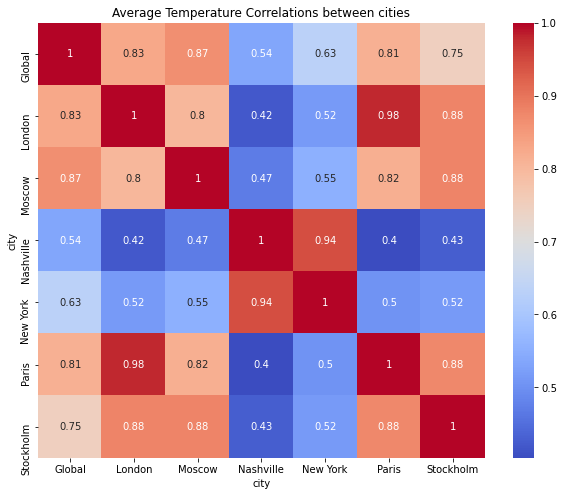

In [ ]:
# Use seaborn heatmap to see the correlations

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 10})

rolling_corr_values = rollingdata.corr()

ax = sns.heatmap(rolling_corr_values, annot = True, cmap = 'coolwarm').set_title('Average Temperature Correlations between cities')



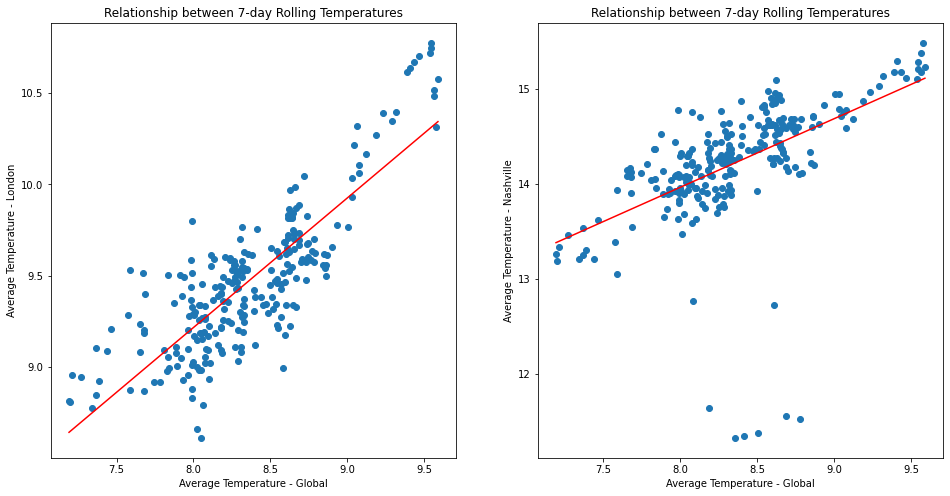

In [ ]:
# Draw twp subplots to show the correlations of the cities

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))

x = rollingdata['Global']
y = rollingdata['London']
z = rollingdata['Nashville']

ax1.scatter(x, y)
ax1.set_title('Relationship between 7-day Rolling Temperatures')
ax1.set_xlabel('Average Temperature - Global')
ax1.set_ylabel('Average Temperature - London')
ax1.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

ax2.scatter(x, z)
ax2.set_title('Relationship between 7-day Rolling Temperatures')
ax2.set_xlabel('Average Temperature - Global')
ax2.set_ylabel('Average Temperature - Nashville')
ax2.plot(np.unique(x), np.poly1d(np.polyfit(x, z, 1))(np.unique(x)), color='red')

plt.show()

In [ ]:
# This section is only for the graduate students.
# Write a code that finds the city that has the highest correlation with the global temperature



# BONUS
Use all the city temps to find the most correlated one  with the global. some df operations for missing data and years, some cities they some problems, and the data is huge don't try the heat map to see. Find max correlation from the correlation table.

In [ ]:
x = np.array(corr_values['Global'])
max = -1
mostcorrelated = 0
for i in range (len(x)):
    if (x[i] !=1 and x[i] > max):
        max = x[i]
        mostcorrelated = i
print(corr_values.index[mostcorrelated])

Moscow


In [ ]:
data[data.isna().any(axis=1)]

,year,city,country,avg_temp
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN
5,1854,Abidjan,Côte D'Ivoire,NaN
6,1855,Abidjan,Côte D'Ivoire,NaN
14,1863,Abidjan,Côte D'Ivoire,NaN
...,...,...,...,...
70617,1749,Zagreb,Croatia,NaN
70884,1840,Zapopan,Mexico,NaN
70885,1841,Zapopan,Mexico,NaN
70886,1842,Zapopan,Mexico,NaN


In [ ]:
print(data[data['city'] =='Benghazi'].to_string())

      year      city country  avg_temp
8729  1753  Benghazi   Libya     18.87
8730  1754  Benghazi   Libya     19.03
8731  1755  Benghazi   Libya     18.76
8732  1756  Benghazi   Libya     19.36
8733  1757  Benghazi   Libya     19.16
8734  1758  Benghazi   Libya     17.17
8735  1759  Benghazi   Libya     18.60
8736  1760  Benghazi   Libya     18.03
8737  1761  Benghazi   Libya     19.14
8738  1762  Benghazi   Libya     19.05
8739  1763  Benghazi   Libya     18.23
8740  1764  Benghazi   Libya     19.09
8741  1765  Benghazi   Libya     19.00
8742  1766  Benghazi   Libya     19.08
8743  1767  Benghazi   Libya     19.60
8744  1768  Benghazi   Libya     17.63
8745  1769  Benghazi   Libya     18.73
8746  1770  Benghazi   Libya     18.62
8747  1771  Benghazi   Libya     18.97
8748  1772  Benghazi   Libya     19.74
8749  1773  Benghazi   Libya     18.89
8750  1774  Benghazi   Libya     19.38
8751  1775  Benghazi   Libya     19.54
8752  1776  Benghazi   Libya     18.65
8753  1777  Benghazi   Li

In [ ]:
pivot_data = data.pivot_table(index = 'year', columns = 'city', values = 'avg_temp')
print(pivot_data)

city  Abidjan  Abu Dhabi  Abuja  Accra  Adana  Adelaide   Agra  Ahmadabad  \
year                                                                        
1743      NaN        NaN    NaN    NaN    NaN       NaN    NaN        NaN   
1744      NaN        NaN    NaN    NaN    NaN       NaN    NaN        NaN   
1745      NaN        NaN    NaN    NaN    NaN       NaN    NaN        NaN   
1750      NaN        NaN    NaN    NaN    NaN       NaN    NaN        NaN   
1751      NaN        NaN    NaN    NaN    NaN       NaN    NaN        NaN   
...       ...        ...    ...    ...    ...       ...    ...        ...   
2011    27.02      28.25  27.09  27.11  19.36     16.90  25.53      27.29   
2012    26.77      28.46  26.93  26.86  19.92     16.84  25.86      27.03   
2013    27.23      28.01  27.25  27.24  20.22     17.39  26.69      27.61   
2014      NaN        NaN    NaN    NaN    NaN       NaN    NaN        NaN   
2015      NaN        NaN    NaN    NaN    NaN       NaN    NaN        NaN   

In [ ]:
columns = list(pivot_data)

for i in columns:

    pivot_data[i].fillna(method = 'pad', inplace = True)
    pivot_data[i].fillna(method = 'bfill', inplace = True)

print(pivot_data)



city  Abidjan  Abu Dhabi  Abuja  Accra  Adana  Adelaide   Agra  Ahmadabad  \
year                                                                        
1743    25.58      26.04  26.93  25.70  21.62     15.54  25.05      26.35   
1744    25.58      26.04  26.93  25.70  21.62     15.54  25.05      26.35   
1745    25.58      26.04  26.93  25.70  21.62     15.54  25.05      26.35   
1750    25.58      26.04  26.93  25.70  21.62     15.54  25.05      26.35   
1751    25.58      26.04  26.93  25.70  21.62     15.54  25.05      26.35   
...       ...        ...    ...    ...    ...       ...    ...        ...   
2011    27.02      28.25  27.09  27.11  19.36     16.90  25.53      27.29   
2012    26.77      28.46  26.93  26.86  19.92     16.84  25.86      27.03   
2013    27.23      28.01  27.25  27.24  20.22     17.39  26.69      27.61   
2014    27.23      28.01  27.25  27.24  20.22     17.39  26.69      27.61   
2015    27.23      28.01  27.25  27.24  20.22     17.39  26.69      27.61   

In [ ]:
pivot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 1743 to 2015
Columns: 330 entries, Abidjan to Zapopan
dtypes: float64(330)
memory usage: 695.6 KB


In [ ]:
corr_data = pivot_data.corr()
print(corr_data)

city           Abidjan  Abu Dhabi     Abuja     Accra     Adana  Adelaide  \
city                                                                        
Abidjan       1.000000   0.739497  0.085134  0.918734  0.027358  0.609776   
Abu Dhabi     0.739497   1.000000  0.038363  0.693203  0.091661  0.619856   
Abuja         0.085134   0.038363  1.000000  0.167711  0.337377 -0.097843   
Accra         0.918734   0.693203  0.167711  1.000000 -0.014014  0.628962   
Adana         0.027358   0.091661  0.337377 -0.014014  1.000000 -0.059127   
...                ...        ...       ...       ...       ...       ...   
Xuzhou        0.706151   0.725672 -0.223065  0.725786 -0.150840  0.685493   
Yamoussoukro  0.961345   0.769915  0.108042  0.941111  0.012088  0.667520   
Yerevan       0.427338   0.501934  0.174781  0.398288  0.628129  0.333967   
Zagreb        0.391865   0.344228  0.081054  0.402311  0.011604  0.383704   
Zapopan       0.669988   0.608559 -0.313019  0.732598 -0.200805  0.637771   

In [ ]:
global_corr = corr_data['Global']
print(global_corr)

city
Abidjan         0.666377
Abu Dhabi       0.653817
Abuja           0.036452
Accra           0.656049
Adana           0.195351
                  ...   
Xuzhou          0.645630
Yamoussoukro    0.700030
Yerevan         0.522717
Zagreb          0.470206
Zapopan         0.585428
Name: Global, Length: 330, dtype: float64


In [ ]:
sort = global_corr.sort_values(kind="quicksort", ascending = False)
print(sort)

city
Global           1.000000
Benghazi         0.781045
Tripoli          0.765368
Bangalore        0.752585
Rabat            0.742777
                   ...   
Los Angeles     -0.188169
El Paso         -0.248290
Santo Domingo   -0.285380
Santiago        -0.377948
La Paz          -0.407135
Name: Global, Length: 330, dtype: float64


# The temperature in Benghazi is the most correlated with the global temperature compared to the rest of the cities in the world with 0.78 correlation.